<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSCM602013 • Statistika dan Probabilitas

Semester Gasal 2025/2026

Fakultas Ilmu Komputer, Universitas Indonesia


- **Name:** Zhafira Uzma, Neal Guarddin, Ahmad Zein Rasyid Siregar
- **NPM:** 2406495451, 2406348282, 2406408395
- **Class:** C




# 🪙 Problem 1: The Coin Toss Game (20 points)

Imagine you found a game in the city's carnival. Each player tosses a coin 20 times. Every time the coin lands on heads, they win 1 point. Every tails gives 0 points. After 20 tosses, the total points = the number of heads.

**Now here’s the big question:** If thousands of players play this game, how often will each final score (0, 1, 2, …, 20) appear?

*Note: This question is the heart of probability: how randomness accumulates when we repeat the same simple action many times.*

---

## Concepts Used In This Problem

* **Bernoulli trial:** a single experiment with only two outcomes (like a coin toss: $head$ or $tail$).
* **Binomial distribution:** the theoretical rule that tells us the chance of getting exactly $𝑘$ heads out of $𝑛$ tosses.
* **Empirical probability:** probability we estimate by simulating and counting outcomes. For example, if out of $10,000$ players, $2,450$ ended with exactly $10$ heads, we say the empirical probability is $2,450/10,000=0.245$.
* **Distribution (a histogram):** a way to see "which results are common, which are rare."
* **Law of Large Numbers (LLN):** as the number of players grows, the empirical proportions converge to the true $p$.

---

## Given

The provided code already:

1. Simulates 50,000 players with $n=20$ tosses and $p=0.5$, then builds the frequency table and histogram.
2. Compares the empirical results with the theoretical Binomial$(n=20, p=0.5)$ probabilities.
3. Explores biased coins with $p=0.3$ and $p=0.7$ to observe how the distribution shifts and skews.

Use the results and functions from that code to answer the following extended questions.

---

## Your Tasks

1. **Should you play the game (5 pts)?** Suppose you are at that carnival. You found out that the carnival now charges an entry fee $F$ to play the game. If a player gets more than $15$ heads in $20$ tosses from a fair coin (i.e., $p=0.5$), the player wins a prize with value $A$.

   * Propose a rational player's decision rule **using expected net value (i.e., expected profit)** to decide whether to play or not.
   * Should a rational player join if:

     * $F=1$ and $A=100$?
     * $F=1$ and $A=200$?
     * $F=2$ and $A=100$?
     * $F=2$ and $A=200$?

2. **Analyze the distribution shape (10 pts):**
   Using the plots and values from the simulation:

   * Describe whether the Binomial$(20, 0.5)$ distribution appears symmetric or skewed.
   * Compare the **empirical** and **theoretical** mean and variance:
     $$E[K] = np, \quad \mathrm{Var}(K) = np(1-p).$$
   * Explain how the distribution shape changes when $p = 0.3$ and $p = 0.7$.
   * Relate your findings to the **Law of Large Numbers (LLN)** and **skewness**.

3. **Normal approximation with continuity correction (5 pts):**
   For $K \sim \mathrm{Binomial}(n=20, p=0.5)$, use the Normal approximation
   $$K \approx \mathcal{N}(np, np(1-p))$$
   with a **continuity correction** to estimate and compare:

   * $P(8 \le K \le 12)$
   * $P(K > 15)$
   * $P(K < 5)$

## Scaffolding Codes (fill the TODOs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

np.random.seed(42)  # reproducibility

def simulate_game(n=20, p=0.5, players=50_000):
    """
    Simulate the coin toss game.
    n = number of tosses per player
    p = probability of heads
    players = how many players play
    Returns: scores (0..n), empirical probabilities
    """

    flips = (np.random.rand(players, n) < p)       # each flip: True=head
    counts = flips.sum(axis=1)                     # heads per player
    vals, freq = np.unique(counts, return_counts=True)
    pmf_emp = np.zeros(n+1, dtype=float)
    pmf_emp[vals] = freq / players

    return np.arange(n+1), pmf_emp

def binomial_theory(n, p):
    """Theoretical binomial distribution"""
    k_vals = np.arange(n+1)
    pmf = np.array([comb(n, k) * (p**k) * (1-p)**(n-k) for k in k_vals], dtype=float)
    return k_vals, pmf

def plot_game(n=20, p=0.5, players=50_000):
    k_emp, pmf_emp = simulate_game(n, p, players)
    k_th, pmf_th = binomial_theory(n, p)

    plt.figure(figsize=(8,4.8))
    plt.bar(k_emp, pmf_emp, alpha=0.6, label=f'Empirical (players={players})')
    plt.plot(k_th, pmf_th, marker='o', linewidth=2, label='Theory (Binomial)')
    plt.xlabel('Final score (number of heads)')
    plt.ylabel('Probability')
    plt.title(f'Coin Toss Game: n={n}, p={p}')
    plt.legend()
    plt.show()

plot_game(n=20, p=0.5, players=50_000)

In [ ]:
from math import comb

def p_win_binom(n=20, p=0.5, k_min=16):
    return sum(comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in range(k_min, n+1))

def decide(F, A, pwin):
    decision = ""
    # calculate the profit
    expected_profit = (A*pwin)-F

    # if profit
    if expected_profit > 0:
      decision = "PLAY"
    # if not
    else:
      decision = "DON'T PLAY"

    # the decision play/don't play and expected profit value
    return decision, expected_profit

# main program
pwin = p_win_binom(n=20, p=0.5, k_min=16)
print(f"Probability of winning (K > 15 heads): {pwin:.9f}\n")

print("-" * 65)
print(f"{'Fee (F)':<8} | {'Prize (A)':<10} | {'Expected Profit = (A * P(Win)) - F':<35} | {'Decision':<12}")
print("-" * 65)

for F, A in [(1,100), (1,200), (2,100), (2,200)]:
    decision, ev = decide(F, A, pwin)
    ev_calc_str = f"({A:<3} * {pwin:.6f}) - {F} = {ev: 7.4f}"
    print(f"{F:<8} | {A:<10} | {ev_calc_str:<35} | {decision:<12}")

****
**TASK 2**

* The Binomial (20,0.5) distribution is prefectly symmetric. By looking at the code generated by the code, we can see that the histogram's shape is bell centered exactly at $K = 10$. The probability of getting $k$ heads is the same as the probability of getting $(n-k)$ heads.
* **Theoretical:**  
Mean $E[K]$ = $np = 20 \times 0.5 = \mathbf{10}$  
Variance $\mathrm{Var}(K)$ = $np(1-p)$ = $20 \times 0.5 \times 0.5 = 5$  
**Empirical vs. Theoretical (LLN):**  
The Law of Large Numbers (LLN) states that as the number of experiments (players) increases, the empirical average of the results will converge to the theoretical expected value. With 50,000 players, the empirical mean (the average score of all players) will be extremely close to the theoretical mean of 10. Likewise, the empirical histogram (the "Empirical" bars) will very closely match the theoretical "Binomial" line plot, meaning their variances will also be nearly identical.
* When $p = 0.3$: The distribution is no longer symmetric. Its center (mean) shifts to $np = 20 \times 0.3 = 6$. Since the outcomes are "piled up" on the left side (near 6) and have a long tail extending toward $K=20$, the distribution is positively skewed (or right-skewed).  
When $p = 0.7$: The distribution's center shifts to $np = 20 \times 0.7 = 14$. In this case, the outcomes are "piled up" on the right side (near 14) and have a long tail extending toward $K=0$. This is negatively skewed (or left-skewed).


****
**TASK 3**  
* Mean : $\mu = np = 10$
* Variance : $\sigma^2 = np(1-p) = 5$
* Standard Deviation : $\sigma = \sqrt{5} \approx 2.236$  

$Z = (X - \mu) / \sigma$ and a standard Normal Z-table (where $\Phi(z)$ is the cumulative probability $P(Z \le z)$).

1. $P(8 \le K \le 12)$
* Continuity Correction: $P(8-0.5 \le X \le 12+0.5)$ = $P(7.5 \le X \le 12.5)$
* Z-scores:$Z_1 = (7.5 - 10) / 2.236 = -2.5 / 2.236 \approx -1.118$$Z_2 = (12.5 - 10) / 2.236 = 2.5 / 2.236 \approx 1.118$
* Probability: $P(-1.118 \le Z \le 1.118) = \Phi(1.118) - \Phi(-1.118) \approx 0.8682 - 0.1318 = \mathbf{0.7364}$

2. $P(K > 15)$
* Continuity Correction: $P(K>15+0.5)$ = $P(K>15.5)$
* Z-scores:$Z = (15.5 - 10) / 2.236 = 5.5 / 2.236 \approx 2.46$
* Probability: $P(Z \ge 2.46) =1-\Phi(2.46)\approx 1-0.9931= \mathbf{0.0069}$

3. $P(K < 5)$
* Continuity Correction: $P(K<5-0.5)$ = $P(K<4.5)$
* Z-scores:$Z = (4.5 - 10) / 2.236 = -5.5 / 2.236 \approx -2.46$
* Probability: $P(Z \le -2.46) =\Phi(-2.46)\approx \mathbf{0.0069}$
****

# 🚪 Problem 2: Many-Door Monty… then the Classic 3 Doors (10 points)

You are on a game show with $N$ closed doors. **One door** hides a car; **the rest** hide goats.

You pick one door. The host **knows** where the car is. He then **opens every other door except one**, carefully **never** opening the car and **never** opening your chosen door. Now two doors remain closed: **your original door and one other**. Now, you may stay or switch to that other closed door to win the prize (i.e., the car).

In this Problem 2, you will explore this for $N=10$, then $N=5$, and finally the classic $N=3$.

---

## Learning Goals of This Problem

* See, by simulation, with $N=\{10,5,3\}$ that **switching is almost always better**.
* Quantify how much better by **comparing the win rates**.

---

## Your Tasks (10 points)
1. (**4 pts**) Simulation tables (counts, proportions) for $N=\{10,5,3\}$.
2. (**4 pts**) Bar plots comparing stay vs switch for each $N$.
3. (**2 pts**) Short reasoning (2–4 sentences) of why switching almost always better.

## Scaffold (student starter; fill TODOs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def monty_trial_N(N=10, switch=True):
    """
    Simulate ONE round with N doors.
    Host knows the car, never opens it, and leaves exactly ONE other door closed.
    Return True if the player wins under the chosen strategy.
    """
    # door with car
    car_door = np.random.randint(0,N)
    # player's pick
    player_pick = np.random.randint(0,N)

    # if player pick car
    if player_pick == car_door:
      other_door = np.random.randint(0,N)
      while other_door == player_pick:
        # the other closed door is not the one that player pick
        other_door = np.random.randint(0,N)

    # if player pick foat
    else:
      3 # the other must be car
      other_door = car_door

    # choosing stategy switching
    if switch:
      final_pick = other_door

    # stay
    else:
      final_pick = player_pick

    # return true if player's final pick is car 
    return final_pick == car_door

# simulate the strategy
def simulate_N(N=10, trials=200_000):
    """
    Run 'trials' rounds for both strategies.
    Return: wins_stay, p_stay, wins_switch, p_switch
    """
    stay_results = [monty_trial_N(N, switch=False) for _ in range(trials)]
    #win rate
    wins_stay = np.sum(stay_results)
    
    switch_results = [monty_trial_N(N, switch=True) for _ in range(trials)]
    #win rate
    wins_switch = np.sum(switch_results)

    # the probabilities
    p_stay = wins_stay / trials
    p_switch = wins_switch / trials
    
    return wins_stay, p_stay, wins_switch, p_switch

# print report
def run_and_report(N, trials=200_000):
    wins_stay, p_stay, wins_switch, p_switch = simulate_N(N, trials)
    
    print(f"N={N:<2}: STAY   wins={wins_stay:<6}, p={p_stay:<7.5f} | SWITCH wins={wins_switch:<6}, p={p_switch:<7.5f}")

    return p_stay, p_switch

# main program
N_values = [10, 5, 3]
labels = [f'N={n}' for n in N_values]
stay_probs = []
switch_probs = []

#simulating 
print("--- Simulation Results (200,000 trials each) ---")
for N in N_values:
    p_stay, p_switch = run_and_report(N, trials=200_000)
    stay_probs.append(p_stay)
    switch_probs.append(p_switch)
print("--------------------------------------------------")

stay   = stay_probs
switch = switch_probs
x = np.arange(len(labels)); w = 0.35

# plotting
plt.figure(figsize=(7.2,4.5))
plt.bar(x - w/2, stay,   width=w, label='Stay')
plt.bar(x + w/2, switch, width=w, label='Switch')

plt.ylim(0, 1.05)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.8)
plt.xticks(x, labels)
plt.ylabel('Win rate (proportion)')
plt.title('Monty Hall with N doors: Stay vs Switch')
plt.legend()
plt.tight_layout()

for i in range(len(labels)):
    plt.text(x[i] - w/2, stay[i] + 0.01, f'{stay[i]:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + w/2, switch[i] + 0.01, f'{switch[i]:.3f}', ha='center', va='bottom', fontsize=9)

plt.show()

The **Stay Strategy** wins only if you pick a door with car in it, which has a probability of $1/N$ and if the host open the other doors, it doesn't change the probability. The **Switch Strategy** wins only if you pick a door with goat in it, which has a probability of $(N-1)/N$ and if you pick it, the host will open all other doors with goat in it, leaving only the door with a car in it as the only other door to switch to. In conclusion, **Switching** concentrates THE $(N-1)/N$ probability onto that one remaining choice.

# 🂡 Problem 3: Mystery Deck (10 points)

At the Magic Club, the host secretly chooses one of two decks with equal chance:

1. Standard deck (S): 26 red, 26 black
2. Crimson deck (C): 32 red, 20 black

You open cards **one by one (without replacement)** and only see the **color** (Red/Black). After each $n$-th draw (i.e, $n=0,...,52$), you must update the posterior $P(C|n)$ where $P(C)=0.5$.

Show how the posterior changes from **before the first card** (i.e, draw $n=0$) to **after all cards** (i.e, $n=52$) by plotting $P(C|n)$ for $n=0,...,52$.

---

## Goals of Learning: Hypergeometric Random Variable

After draw $n$, let $r$ be the number of reds and $b=n-r$ the number of blacks observed. Then, the likelihood under a deck with $R$ reds and $B$ blacks is hypergeometric:

$\mathcal{L}(r,b \mid R,B)
= \frac{\binom{R}{r}\,\binom{B}{b}}{\binom{R+B}{\,r+b\,}}.$

---

## Your Tasks

1. (8 pts) A line plot of $P(C|$data up to draw $n)$ for $n=0,...,52$.
2. (2 pts) What is the earlieast draw to know which deck you have?

## Student scaffold (with TODOs)

Note: you may need to restart the kernel to use updated packages.
--- Task Number 1: Plot posterior vs draw index (0..52) ---



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


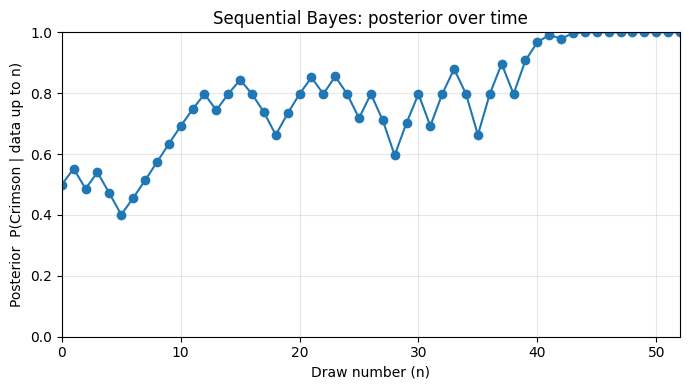

Final r=32, b=20, posterior P(C|all)=1.000000
Earliest draw to know the deck: n=44, deck=Crimson


In [ ]:
# Neal Guarddin
# Import dari template soal
%pip install -q matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import comb
np.random.seed(42)

# --- Deck definitions ---
N = 52
R_S, B_S = 26, 26    # Standard
R_C, B_C = 32, 20    # Crimson
prior_C = 0.5

# --- Choose a true deck for this run (set to "C" or "S") ---
true_deck = "C"  # Change to "S" to test the other case. Ini untuk ganti test case

# --- Build and shuffle the true deck (list of "R"/"B") ---
def build_deck(true_deck="C", seed=7):

    # Validasi input karena isinya harus entah tes Crimson atau Standard
    if true_deck not in ("C","S"):
        raise ValueError("true_deck must be 'C' or 'S'")
    
    # TODO: construct the deck list with the correct counts; then shuffle with RNG.
    deck = (["R"] * (R_C if true_deck == "C" else R_S) + ["B"] * (B_C if true_deck == "C" else B_S))

    # Sudah dibuat deck listnya, lalu di shuffle agar reproducible
    rng = np.random.default_rng(seed)
    rng.shuffle(deck)
    return deck

# --- Hypergeometric log-likelihood helper ---
def log_hypergeom_likelihood(R, B, r, b):
    """
    log P(see r reds and b blacks in n=r+b draws without replacement | R,B in deck)

    log P(lihat r merah & b hitam dalam n = r + b draw tanpa penggantian | deck punya R merah & B hitam)
    Rumus Hypergeometrik: (C(R, r) * C(B, b)) / C(R + B, n) 
    """
    n = r + b
    # TODO: log likelihood of the hypergeometric random variables
    # Validasi dulu, apakah r dan b = 0? nilai r dan b juga harus lebih kecil dari R serta B agar dapat berjalannya perhitungan matematis
    if r < 0 or b < 0 or r > R or b > B:
        # Intinya ngasih tahu bakal jadi negative infinity (bawaan dari package numpy)
        return -np.inf 

    return (
        # Kenapa pake log? karena kan perkalian log dihasilkan dari + serta pembagian dihasilkan dari -. Oleh karena itu, supaya perkalian dan pembagian hypergeometrik bisa dilakukan
        # caranya pakai pendekatan log
        np.log(comb(R, r)) + np.log(comb(B, b)) - np.log(comb(R + B, n))
    )

# --- Posterior updater using Bayes in log-space for stability ---
def posterior_C_after(r, b, prior=prior_C):
    """
    Return P(C | r reds, b blacks) with prior P(C)=prior.

    Kembalikan P(Crimson | r merah, b hitam) dengan prior P(C) = prior.
    Kita pakai log-sum-exp agar numeriknya stabil
    """
    # TODO: compute log-likelihoods under C and S
    # TODO: combine with log-prior, normalize safely, and return posterior for C
    llC = log_hypergeom_likelihood(R_C, B_C, r, b) + np.log(prior)
    llS = log_hypergeom_likelihood(R_S, B_S, r, b) + np.log(1.0 - prior)
    m = max(llC, llS)
    wC = np.exp(llC - m)
    wS = np.exp(llS - m)

    return float(wC / (wC + wS))
    # Bayes: posterior ∝ likelihood × prior, lalu dinormalisasi. log-sum-exp mencegah underflow/overflow.

# --- Run the single reveal sequence; record posterior after each draw ---
deck = build_deck(true_deck=true_deck, seed=7)

r = b = 0
posteriors = [prior_C]   # include n=0
draw_idx   = [0]

# inisialisasi untuk Task 2
earliest_n    = None
earliest_deck = None

# TODO: iterate over the 52 cards, update r/b, compute posterior, append to lists
# enumerate mempermudah hidup wakkaa, setiap list udah dikasih index langsun
for i, card in enumerate(deck, start=1):
    if card == "R":
        r += 1
    else:
        b += 1
    
    impossible_S = (r > R_S) or (b > B_S)   # Standard punya 26/26
    impossible_C = (r > R_C) or (b > B_C)   # Crimson punya 32/20
    if earliest_n is None and (impossible_S or impossible_C):
        earliest_n = i
        earliest_deck = "Crimson" if impossible_S else "Standard"

    # rekam posterior untuk plot (Task 1)
    posteriors.append(posterior_C_after(r, b))
    draw_idx.append(i)
    # Ini loop pembukaan kartu 1-per-1: update hitungan r/b, hitung posterior tiap langkah untuk digambar.


# --- Plot posterior vs draw index (0..52) ---
# Task Nomor 1
print("--- Task Number 1: Plot posterior vs draw index (0..52) ---")
plt.figure(figsize=(7,4))
# TODO: plot draw_idx vs posteriors as a line with markers
plt.plot(draw_idx, posteriors, marker='o') #Task 1
plt.xlim(0, N)
plt.xlabel("Draw number (n)")
plt.ylabel("Posterior  P(Crimson | data up to n)")
plt.title("Sequential Bayes: posterior over time")
plt.ylim(0,1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Print the final counts and posterior ---
print(f"Final r={r}, b={b}, posterior P(C|all)={posteriors[-1]:.6f}")
# Explain briefly: each step used a hypergeometric likelihood.

# Task Nomor 2: Earliest draw to know the deck
if earliest_n is not None:
    print(f"Earliest draw to know the deck: n={earliest_n}, deck={earliest_deck}")
else:
    print("Belum pasti sampai akhir (tidak ada draw yang membuat salah satu dek mustahil).")


# 🎲 Problem 4: The Sum and Difference of Two Dice (15 points)

In a new tabletop experiment, a player rolls **two independent dice** at once:

* **Die A:** a **6-sided** die with faces 1–6.
* **Die B:** an **8-sided** die with faces 1–8.

Each roll records two random variables:

* (S = A + B)  (the **sum** of the two dice)
* (D = |A - B|)  (the **absolute difference** between them)

The designer wants to understand how these two outcomes behave jointly.

---

## Tasks

1. **(7 pts) Simulate the joint PMF.**
   Roll both dice 10 000 times and build the **empirical joint probability table** (P(S,D)).
   Present it either as a matrix or DataFrame whose rows = values of (S), columns = values of (D).

2. **(2 pts) Find the marginals.**
   Compute
   $$
   P_S(s)=\sum_d P(S=s,D=d),\qquad
   P_D(d)=\sum_s P(S=s,D=d).
   $$

3. **(4 pts) Moments.**
   Estimate
   $$
   E[S],;E[D],;\mathrm{Var}(S),;\mathrm{Var}(D),;\mathrm{Cov}(S,D),;\mathrm{Corr}(S,D).
   $$

4. **(2 pts) Analysis.**
   Answer briefly:

   * Why are some ((S,D)) pairs impossible (i.e., have (P(S,D)=0))?
   
   * Does knowing (S) give information about (D)? Are they independent? Explain using intuition or your simulation table.



# 🎲 Problem 4: The Sum and Difference of Two Dice (15 points)

In a new tabletop experiment, a player rolls **two independent dice** at once:

* **Die A:** a **6-sided** die with faces 1–6.
* **Die B:** an **8-sided** die with faces 1–8.

Each roll records two random variables:

* (S = A + B)  (the **sum** of the two dice)
* (D = |A - B|)  (the **absolute difference** between them)

The designer wants to understand how these two outcomes behave jointly.

---

## Tasks

1. **(7 pts) Simulate the joint PMF.**
   Roll both dice 10 000 times and build the **empirical joint probability table** (P(S,D)).
   Present it either as a matrix or DataFrame whose rows = values of (S), columns = values of (D).

2. **(2 pts) Find the marginals.**
   Compute
   $$
   P_S(s)=\sum_d P(S=s,D=d),\qquad
   P_D(d)=\sum_s P(S=s,D=d).
   $$

3. **(4 pts) Moments.**
   Estimate
   $$
   E[S],;E[D],;\mathrm{Var}(S),;\mathrm{Var}(D),;\mathrm{Cov}(S,D),;\mathrm{Corr}(S,D).
   $$

4. **(2 pts) Analysis.**
   Answer briefly:

   * a. Why are some ((S,D)) pairs impossible (i.e., have (P(S,D)=0))?\A
   * b. Does knowing (S) give information about (D)? Are they independent? Explain using intuition or your simulation table.

**Jawaban 4a:**\
Karena harus ada bilangan bulat A ∈ {1 ≤ A ≤ 6} dan B ∈ {1 ≤ B ≤ 8}. Serta memenuhi ekuivalen A+B=S dan ∣𝐴−𝐵∣=𝐷.\
   Ini ekuivalen dengan:
   $$
   A = \frac{S \pm D}{2},     B = \frac{S \mp  D}{2}\
   $$ 
   Syarat-syaratnya:
   - Paritas: **S dan 𝐷 harus separitas** (keduanya genap atau keduanya ganjil). Agar A dan B bilangan bulat. Contoh mustahil: (S, D) = (3, 0) atau (2, 1)
   - Rentang dadu: 1 ≤ A ≤ 6, 1 ≤ B ≤ 8. Dari sini didapat batas sederhana 0 ≤ D ≤ 7 dan D ≤ min(S - 2, 16 - S). Contoh mustahul: (14, 5) karena melanggar D ≤ 16 - 14 = 2\

**Jawaban 4b:**\
   Ya, mengetahui S mengubah distribusi 𝐷 -> tidak independen.\
   Intuisi tabel menunjukkan:
   - Jika S = 2, maka pasti (A, B) = (1, 1) -> D = 0 dengan probabilitas 1, padahal tanpa kondisi P(D = 0) jauh lebih kecil
   - D = 7 hanya mungkin saat S = 9 (pasangan (1, 8)); untuk S tidak sama dengan 9, P(D = 7 | S) = 0.\
   Jadi, mengetahui S sangat membatasi nilai 𝐷; karenanya S dan 𝐷 tidak independen.


## Starter Code


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Task 1:


D,0,1,2,3,4,5,6,7
S,,,,,,,,
2,0.0213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0417,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0217,0.0000,0.0441,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0438,0.0000,0.0412,0.0000,0.0000,0.0000,0.0000
6,0.0198,0.0000,0.0404,0.0000,0.0438,0.0000,0.0000,0.0000
7,0.0000,0.0449,0.0000,0.0434,0.0000,0.0435,0.0000,0.0000
8,0.0221,0.0000,0.0415,0.0000,0.0407,0.0000,0.0195,0.0000
9,0.0000,0.0368,0.0000,0.0411,0.0000,0.0223,0.0000,0.0198
10,0.0222,0.0000,0.0413,0.0000,0.0182,0.0000,0.0202,0.0000


Task 2:


,P_S(s)
S,
2,0.0213
3,0.0417
4,0.0658
5,0.0850
6,0.1040
7,0.1318
8,0.1238
9,0.1200
10,0.1019


,P_D(d)
D,
0,0.1285
1,0.2289
2,0.2075
3,0.1648
4,0.1248
5,0.0860
6,0.0397
7,0.0198


Task 3:
E[S] ≈ 7.9507, Var(S) ≈ 8.1947
E[D] ≈ 2.4443, Var(D) ≈ 3.1137
Cov(S,D) ≈ 0.8788, Corr(S,D) ≈ 0.1740



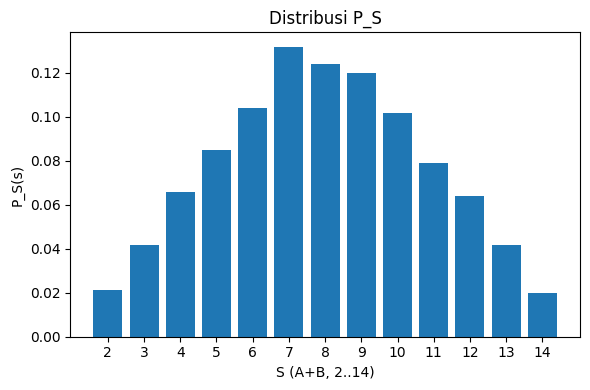

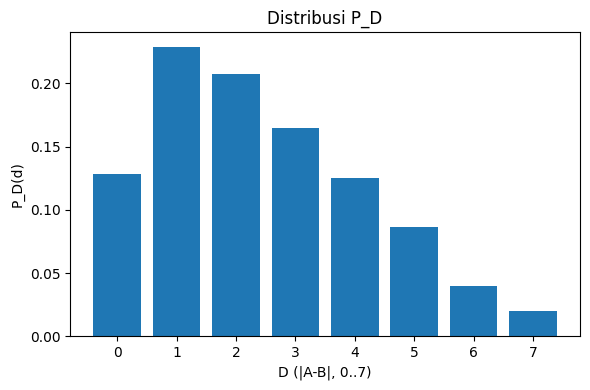

Task 4:


In [ ]:
%pip install -q pandas ipython
import numpy as np
import pandas as pd
from IPython.display import display

# Untuk display tabel yang rapi
import matplotlib.pyplot as plt

N = 10_000
rng = np.random.default_rng(42)

# --- Step 1: Simulate the two dice ---
A = rng.integers(1, 7, size=N)     # 6-sided
B = rng.integers(1, 9, size=N)     # 8-sided

# --- Step 2: Define random variables ---
S = A + B          # Sum
D = np.abs(A - B)  # Absolute difference

# TODO 1: Build joint frequency table of (S,D)
print("Task 1:")
df = pd.DataFrame({
    "S": S,
    "D": D,
})

joint_counts = df.value_counts(["S", "D"]).unstack(fill_value=0).sort_index().sort_index(axis=1)
joint_pmf = joint_counts / float(N)

display(joint_pmf) # Opsional untuk tampilin tabel aja

# TODO 2: Compute marginals P_S and P_D. Mencari marginal
print("Task 2:")
P_S = joint_pmf.sum(axis = 1)   # P(S=s) = ∑_d P(S=s, D=d)
P_D = joint_pmf.sum(axis = 0)   # P(D=d) = ∑_s P(S=s, D=d)

# sanity check: peluang menjumlah ke 1
assert abs(joint_pmf.values.sum() - 1.0) < 1e-9
assert abs(P_S.values.sum() - 1.0) < 1e-9
assert abs(P_D.values.sum() - 1.0) < 1e-9

# (opsional, tampilkan marginal)
display(P_S.to_frame("P_S(s)"))
display(P_D.to_frame("P_D(d)"))

# TODO 3: Estimate E[S], E[D], Var(S), Var(D), Cov(S,D), Corr(S,D)
print("Task 3:")
# E[S], Var(S) dari marginal P_S
ES = np.sum(P_S.index.values * P_S.values)                  # E[S] = ∑_s s * P(S=s)
VarS = np.sum((P_S.index.values**2) * P_S.values) - ES**2   # Var(S) = ∑_s (s - E[S])^2 * P(S=s)

# E[D], Var(D) dari marginal P_D
ED = np.sum(P_D.index.values * P_D.values)
VarD = np.sum((P_D.index.values**2) * P_D.values) - ED**2

# E[SD] dari joint PMF, lalu Cov & Corr
E_SD = 0.0
for s, row in joint_pmf.iterrows():
    for d, p in row.items():
        E_SD += s * d * p

CovSD = E_SD - (ES * ED)                     # Cov(S,D) = E[SD] - E[S]E[D]
CorrSD = CovSD / np.sqrt(VarS * VarD)        # Corr(S,D) = Cov(S,D) / (σ_S * σ_D)

print(f"E[S] ≈ {ES:.4f}, Var(S) ≈ {VarS:.4f}")
print(f"E[D] ≈ {ED:.4f}, Var(D) ≈ {VarD:.4f}")
print(f"Cov(S,D) ≈ {CovSD:.4f}, Corr(S,D) ≈ {CorrSD:.4f}")

plt.figure(figsize=(6,4))
plt.bar(P_S.index.astype(str), P_S.values)
plt.xlabel("S (A+B, 2..14)"); plt.ylabel("P_S(s)"); plt.title("Distribusi P_S")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.bar(P_D.index.astype(str), P_D.values)
plt.xlabel("D (|A-B|, 0..7)"); plt.ylabel("P_D(d)"); plt.title("Distribusi P_D")
plt.tight_layout(); plt.show()

# TODO 4: Write your analysis in a Markdown cell
print("Task 4:")




# 🐞Problem 5: Finding errors in a piece of software (20 Point)

One good brief intro about Monte Carlo methods is as follows (taken from Baron, 2019).
> Computer simulations refer to a regeneration of a process by writing a suitable computer
program and observing its results. Monte Carlo methods are those based on computer
simulations involving random numbers.
> The main purpose of simulations is estimating such quantities whose direct computation is
complicated, risky, consuming, expensive, or impossible. For example, suppose a complex
device or machine is to be built and launched. Before it happens, its performance is
simulated, and this allows experts to evaluate its adequacy and associated risks carefully and
safely. For example, one surely prefers to evaluate reliability and safety of a new module of
a space station by means of computer simulations rather than during the actual mission.
> Monte Carlo methods are mostly used for the computation of probabilities, expected values,
and other distribution characteristics. Recall that probability can be deﬁned as a long-run
proportion. With the help of random number generators, computers can actually simulate
a long run. Then, probability can be estimated by a mere computation of the associated
observed frequency. The longer run is simulated, the more accurate result is obtained.
Similarly, one can estimate expectations, variances, and other distribution characteristics
from a long run of simulated random variables.

Every day, software developers ﬁnd a random number of errors and correct them.
The number of errors $X_t$ found on day $t$ is modeled by a Poisson($\lambda_t$) distribution
whose parameter is the smallest number of errors found during the previous 3 days.
That is,
$$\lambda_t = min( X_{t-1} , X_{t - 2} , X_{t - 3}).$$
Suppose that during the ﬁrst three days, software developers ﬁnd 28, 22, and 18 errors.

1. Predict the time it will take to ﬁnd all the errors.
2. Estimate the probability that some errors will remain undetected after 21 days.
3. Predict the total number of errors in this new release.

### Target Output
1. The expected time to detect all the errors is about 19.7 days,
2. The probability that errors remain after 21 days is about 0.34,
3. The total number of errors is about 222 errors overall.

### Your task
Write Python code to reproduce the target output above.
Do not hardcode any result.


In [ ]:
import numpy as np

SIMULATION_LENGTH:int = 1000
TOTAL_SIMULATION:int = 500
DAYS_CHECKED:int = 21

init_errors_found = [28, 22, 18]
init_poisson_lambda = min(init_errors_found)
poisson_lambda = init_poisson_lambda
days_stats:list[int] = [] # A list of the days needed to find all errors in indexed-i simulation
errors_stats:list[int] = init_errors_found # A list of errors found on indexed-i day in all simulation
after_day_count = 0

for _ in range(TOTAL_SIMULATION):
    poisson_lambda = init_poisson_lambda
    for day in range(4, SIMULATION_LENGTH):
        nday_errors = np.random.Generator.poisson(poisson_lambda) 
        if nday_errors == 0: # Errors not found, assume all errors has been found
            days_stats.append(day + 3)
            if day > DAYS_CHECKED:
                after_day_count += 1
            break
        poisson_lambda = min(nday_errors, poisson_lambda)
        errors_stats.append(nday_errors)

expected_days = np.average(days_stats)
prob:float = 1.00 * after_day_count / len(days_stats) 
expected_errors = np.average(errors_stats)
# Prints outputs
print(f"1. The expected time to detect all errors is about { expected_days } days,")
print(f"2. The probability that errors remain after { DAYS_CHECKED } days is about { prob:.1f }")
print(f"3. The total amount of errors is about { expected_errors } errors overall.")


ModuleNotFoundError: No module named 'numpy'